# Get Analytical PDFs for 2D histograms in S1-logS2 space: Nuclear Recoils

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.optimize import curve_fit
import numpy as np
from scipy.special import erf, erfc
from matplotlib.colors import LogNorm

print("...Starting Notebook...")

...Starting Notebook...


In [2]:
#Set range parameters for the histograms:
logS2Min, logS2Max = 2.0, 5.
nS2Bins = 40

s1Min, s1Max = 1.5, 100.5
nS1Bins = 99
print( "Using %i Bins" % (nS1Bins*nS2Bins))
print("...Done!")

Using 3960 Bins
...Done!


#### Get the NEST data files; loop through them and add S1c, S2c, and logS2c to lists if they're within the histogram ranges

In [4]:
#get NEST data file
path = "/network/rit/lab/szydagislab/GR/NEST/v2.1.0/build/NRfiles/"
fileList = "NRfile.list"
files = [line.rstrip() for line in open(path+fileList)]
print("Loading %i files..." % len(files))
#sort through, skipping the text header info, and exclude events with R > 700 mm
S1, S2, logS2 = [], [], []
n = 0
for fileName in files:
    print( "%i / 100 (%i events)" % (n, len(S1)) )
    data = [line.rstrip() for line in open(path+fileName)]
    thresh = 0.
    n+=1 
    thisS1, thisS2, thisLogS2 = [], [], []
    for i in range(4, len(data)):
        '''if ( float(i)/float(len(data))*100. > thresh):
            print( "%i / 100" % thresh)
            thresh += 20.'''
        RQs = data[i].split()
        #X,Y = float(RQs[3][:-1]), float(RQs[4][:-1]) #remove commas from X,Y text
        #if ( X*X + Y*Y < 490000 ):
        S1c = float(RQs[9])
        S2c = (float(RQs[13]))
        logS2c = np.log10(S2c)
        if ( S1c > s1Min and S1c <= s1Max and logS2c > logS2Min and logS2c <= logS2Max ):
            thisS1.append( S1c )
            thisS2.append( S2c )
            thisLogS2.append( logS2c )
    if len(S1) == 0:
        S1 = np.array(thisS1)
        S2 = np.array(thisS2)
        logS2 = np.array(thisLogS2)
    else:
        S1 = np.concatenate( (S1, np.array(thisS1)) )
        S2 = np.concatenate( (S2, np.array(thisS2)) )
        logS2 = np.concatenate( (logS2, np.array(thisLogS2)) )
    if len(S1) > 1e7:
        break
        
    
    
print("...Done!")
print(len(S1), len(S2), len(logS2))

Loading 99 files...
0 / 100 (0 events)


/network/rit/misc/software/jupyterhub/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log10


1 / 100 (1742913 events)
2 / 100 (3484954 events)
3 / 100 (5228266 events)
4 / 100 (6971570 events)
5 / 100 (8713589 events)
...Done!
10456613 10456613 10456613


#### Visualize the histogram! 

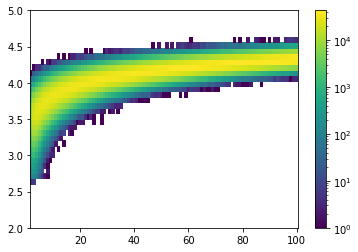

'totalEvents = len(logS2)\nhistZ, histX, histY = np.histogram2d(S1, logS2, bins=(nS1Bins, nS2Bins), range=([s1Min, s1Max], [logS2Min, logS2Max]))\nZo, weightedZ = [], []\nxCenter, yCenter = [], []\nbinAreas = []\nfor i in range(nS1Bins):\n    for j in range(nS2Bins):\n        deltaX = histX[i+1]-histX[i]  #S1_binMax - S1_binMin (phd)\n        deltaY = pow(10.,histY[j+1])-pow(10., histY[j])  #10^(logS2/S1 max) - 10^(logS2/S1 min)  [phd/phd]\n        area = deltaX*deltaY # in S1 * S2/S1 space NOT LOG_SPACE!!!\n        xCenter.append( histX[i] + deltaX/2. )\n        yCenter.append( np.mean([histY[j], histY[j+1]]) )# + deltaY/2. )\n        Zo.append( histZ[i][j] )\n        binAreas.append( area )\n        weightedZ.append( float(histZ[i][j])/float(totalEvents)/area ) #divide the bin out by its area \n        \n\nprint(min(binAreas), max(binAreas))\nsc = plt.scatter( xCenter, yCenter, c=weightedZ, s = 10 )\nplt.colorbar(sc)\nplt.xlim(s1Min, s1Max)\nplt.ylim(logS2Min, logS2Max)\nplt.show()\n

In [6]:
#Look at the histogram to get starting ranges for logS2
cm = plt.cm.get_cmap('viridis')
h2 = plt.hist2d(S1, logS2, bins=(nS1Bins, nS2Bins), range=([s1Min, s1Max], [logS2Min, logS2Max]), norm=LogNorm())#, range=([1.5, 100.5], [500, 50000]))
plt.colorbar(h2[3])
#plt.yscale('log')
plt.show()
'''
cm = plt.cm.get_cmap('viridis')
h2 = plt.hist2d(S1, S2, bins=(nS1Bins, nS2Bins), range=([s1Min, s1Max], [10.**logS2Min, 10.**logS2Max]))#, range=([1.5, 100.5], [500, 50000]))
plt.colorbar(h2[3])
plt.yscale('log')
plt.show()
'''
#Below in an example of weighting the histogram bins by bin area, in order to convert from S1-S2 space 
### to S1-logS2 space --> Shouldn't be necessary in the PLR bins things in terms of S1-logS2
'''totalEvents = len(logS2)
histZ, histX, histY = np.histogram2d(S1, logS2, bins=(nS1Bins, nS2Bins), range=([s1Min, s1Max], [logS2Min, logS2Max]))
Zo, weightedZ = [], []
xCenter, yCenter = [], []
binAreas = []
for i in range(nS1Bins):
    for j in range(nS2Bins):
        deltaX = histX[i+1]-histX[i]  #S1_binMax - S1_binMin (phd)
        deltaY = pow(10.,histY[j+1])-pow(10., histY[j])  #10^(logS2/S1 max) - 10^(logS2/S1 min)  [phd/phd]
        area = deltaX*deltaY # in S1 * S2/S1 space NOT LOG_SPACE!!!
        xCenter.append( histX[i] + deltaX/2. )
        yCenter.append( np.mean([histY[j], histY[j+1]]) )# + deltaY/2. )
        Zo.append( histZ[i][j] )
        binAreas.append( area )
        weightedZ.append( float(histZ[i][j])/float(totalEvents)/area ) #divide the bin out by its area 
        

print(min(binAreas), max(binAreas))
sc = plt.scatter( xCenter, yCenter, c=weightedZ, s = 10 )
plt.colorbar(sc)
plt.xlim(s1Min, s1Max)
plt.ylim(logS2Min, logS2Max)
plt.show()
'''

### Start the fitting procedure: define the skew-Gaussian fitting function

Functional form from reference.wolfram.com/language/ref/SkewNormalDistribution.html

In [18]:
def skewGauss(x, xi, omega, alpha, A):
    #xi -- location parameters (Gaussian Equivalent is mu)
    #omega -- scale parameters (Gaussian Equivalent is sigma)
    #alpha -- shape parameters (sets skew amount and direction)
    #A -- just the normalization to make up for not being unity for each S1 bin
    return (A*np.exp( -0.5*( pow((x - xi)/omega, 2.) ) ) / ( np.sqrt( 2.*np.pi ) * omega ) * erfc( -1.*alpha*(x - xi)/omega/np.sqrt(2.) ))

print("...Done!")

...Done!


In [15]:
#Go through the 2D histogram, and for each  row of S1 bins, get the logS2 distributions
totalEvents = len(logS2)
histZ, histX, histY = np.histogram2d(S1, logS2, bins=(nS1Bins, nS2Bins), range=([s1Min, s1Max], [logS2Min, logS2Max]))
print("Made the histogram!")

Made the histogram!


#### Take the 2D numpy histogram, and fit a skew-gaussian for each S1-bin; 
#### Save the best fit parameters as functions of S1c

0 2.5 1.5
49851.0
Plotting....
[ 3.68962040e+00  2.71505571e-01 -1.71010370e+00  3.71679460e+03]


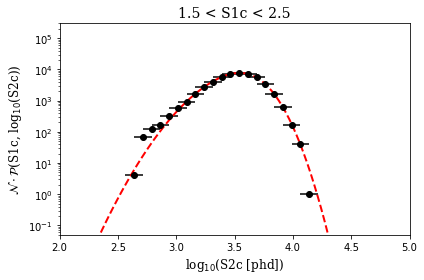

1 3.5 2.5
138443.0
Plotting....
[ 3.71039302e+00  2.65920977e-01 -1.67284588e+00  1.03177280e+04]


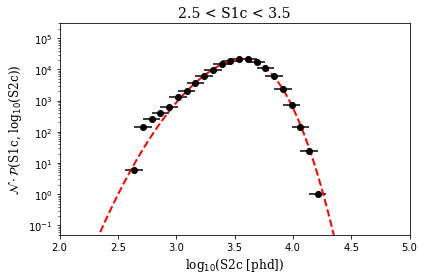

2 4.5 3.5
164611.0
Plotting....
[ 3.74951984e+00  2.55091119e-01 -1.67178786e+00  1.22869391e+04]


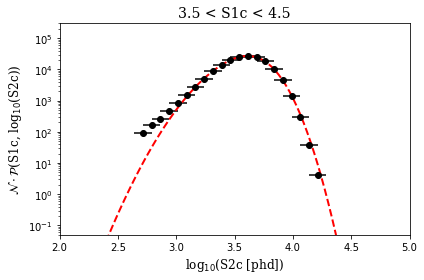

3 5.5 4.5
160311.0
Plotting....
[ 3.78747084e+00  2.36253890e-01 -1.61470550e+00  1.19797849e+04]


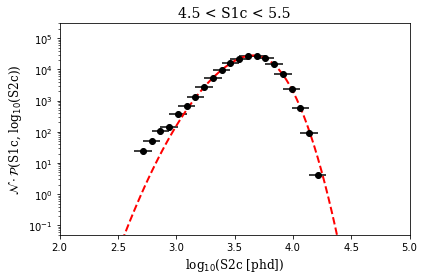

4 6.5 5.5
155185.0
Plotting....
[ 3.81930011e+00  2.16422675e-01 -1.51652279e+00  1.15917586e+04]


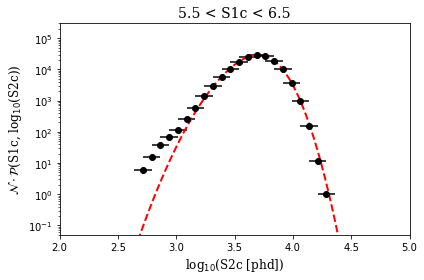

5 7.5 6.5
151204.0
Plotting....
[ 3.84437852e+00  2.01026052e-01 -1.38501209e+00  1.13294977e+04]


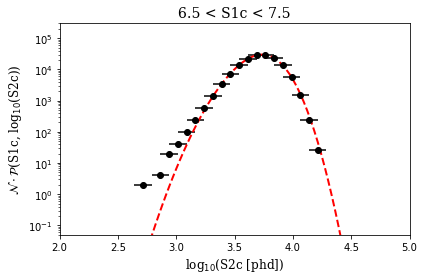

6 8.5 7.5
147200.0
Plotting....
[ 3.86989164e+00  1.90875345e-01 -1.34364273e+00  1.10381016e+04]


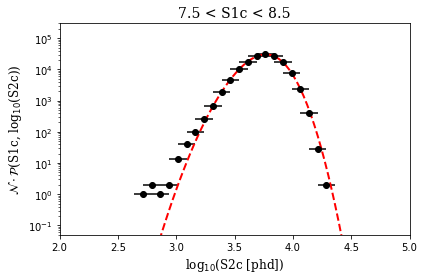

7 9.5 8.5
143851.0
Plotting....
[ 3.89014551e+00  1.79738084e-01 -1.27390310e+00  1.07822414e+04]


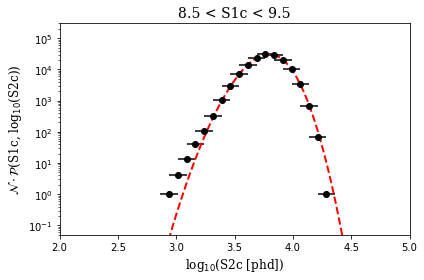

8 10.5 9.5
139914.0
Plotting....
[ 3.90895195e+00  1.71235351e-01 -1.19801247e+00  1.05019144e+04]


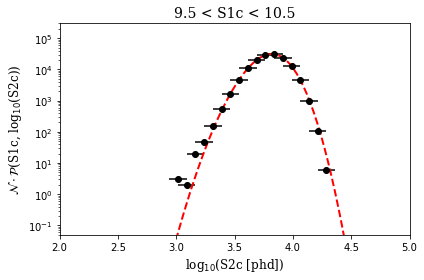

9 11.5 10.5
136084.0
Plotting....
[ 3.92907430e+00  1.65196434e-01 -1.20616348e+00  1.02121317e+04]


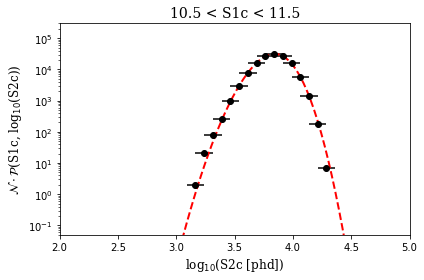

10 12.5 11.5
133026.0
Plotting....
[ 3.94067359e+00  1.56432030e-01 -1.08852669e+00  9.98799779e+03]


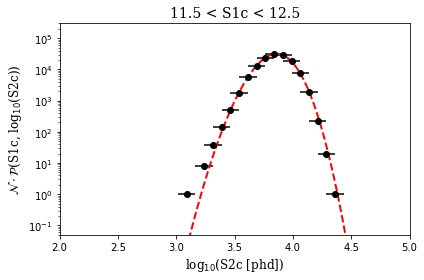

11 13.5 12.5
130706.0
Plotting....
[ 3.95796599e+00  1.50948046e-01 -1.10830949e+00  9.79062411e+03]


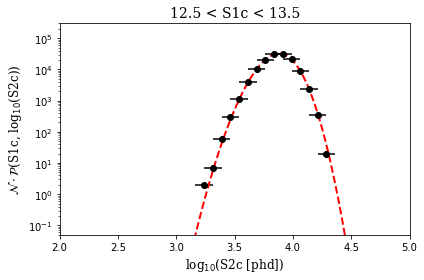

12 14.5 13.5
129119.0
Plotting....
[ 3.97417613e+00  1.47463223e-01 -1.10540166e+00  9.69012103e+03]


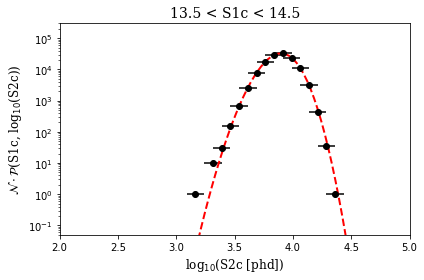

13 15.5 14.5
126646.0
Plotting....
[ 3.98215172e+00  1.40341998e-01 -9.72426173e-01  9.50902162e+03]


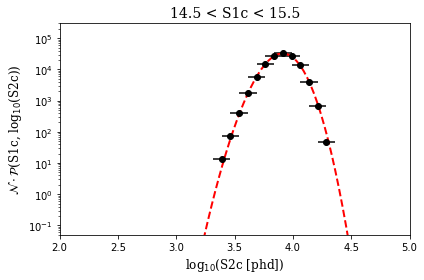

14 16.5 15.5
124551.0
Plotting....
[ 3.99827788e+00  1.38242128e-01 -1.02305806e+00  9.33943492e+03]


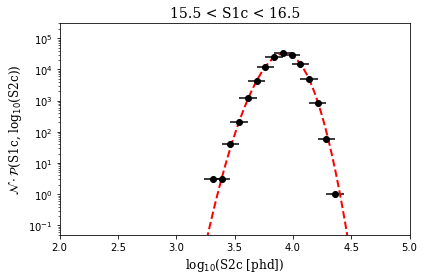

15 17.5 16.5
123168.0
Plotting....
[ 4.00844147e+00  1.33834629e-01 -9.83754355e-01  9.23789426e+03]


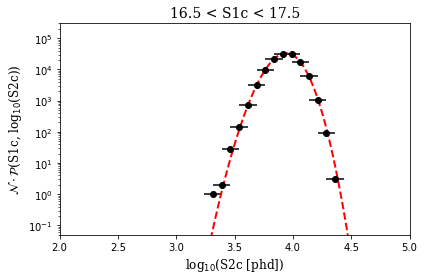

16 18.5 17.5
122127.0
Plotting....
[ 4.01825531e+00  1.29744353e-01 -9.43787134e-01  9.15794268e+03]


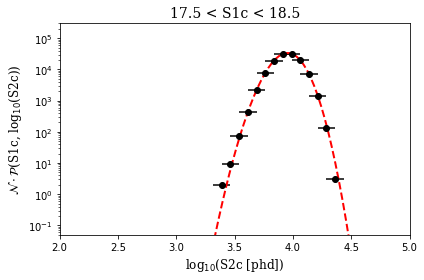

17 19.5 18.5
120694.0
Plotting....
[ 4.03127839e+00  1.28137612e-01 -9.72113117e-01  9.04687414e+03]


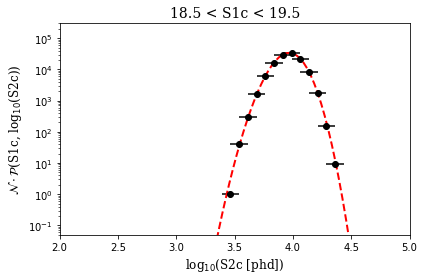

18 20.5 19.5
118203.0
Plotting....
[ 4.04504641e+00  1.28165835e-01 -1.01610475e+00  8.87955499e+03]


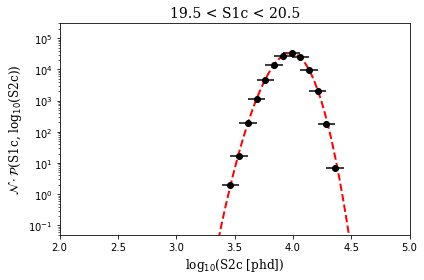

19 21.5 20.5
118934.0
Plotting....
[ 4.05210429e+00  1.23632781e-01 -9.70409677e-01  8.91663084e+03]


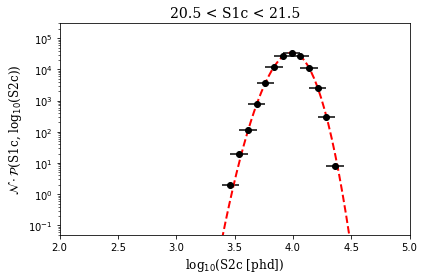

20 22.5 21.5
116279.0
Plotting....
[ 4.06336247e+00  1.22554037e-01 -9.94118219e-01  8.72679574e+03]


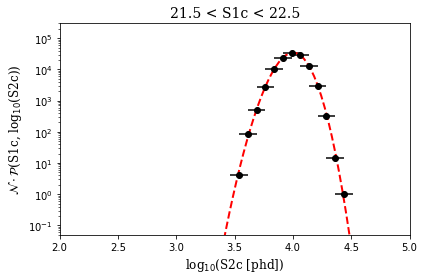

21 23.5 22.5
115933.0
Plotting....
[ 4.07032420e+00  1.18662527e-01 -9.38644331e-01  8.68894016e+03]


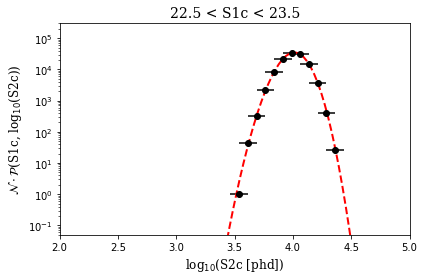

22 24.5 23.5
115056.0
Plotting....
[ 4.07615820e+00  1.15229651e-01 -8.83726915e-01  8.62288561e+03]


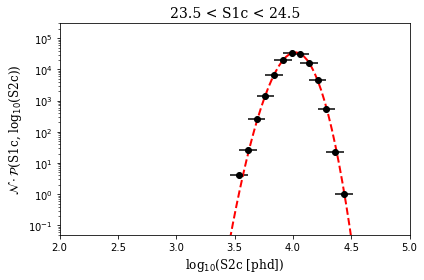

23 25.5 24.5
114962.0
Plotting....
[ 4.08783847e+00  1.15889502e-01 -9.49727283e-01  8.62483340e+03]


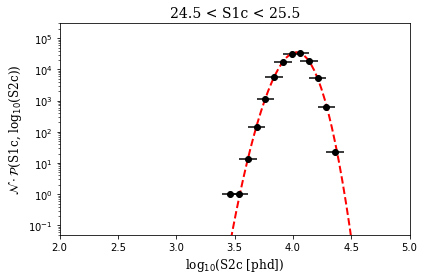

24 26.5 25.5
113479.0
Plotting....
[ 4.09317852e+00  1.12443492e-01 -8.95640372e-01  8.51735303e+03]


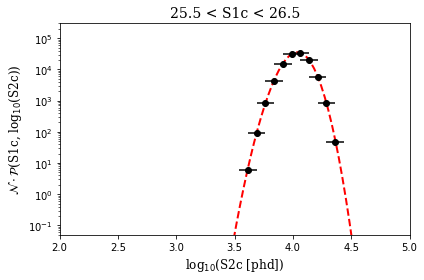

25 27.5 26.5
111885.0
Plotting....
[ 4.09615914e+00  1.07471967e-01 -7.96074720e-01  8.37770164e+03]


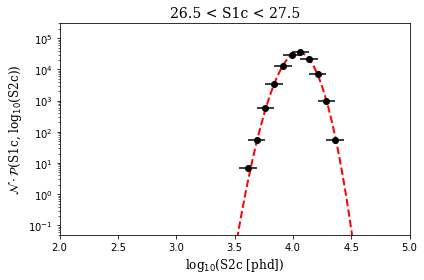

26 28.5 27.5
111615.0
Plotting....
[ 4.10145305e+00  1.05193787e-01 -7.40210183e-01  8.37022313e+03]


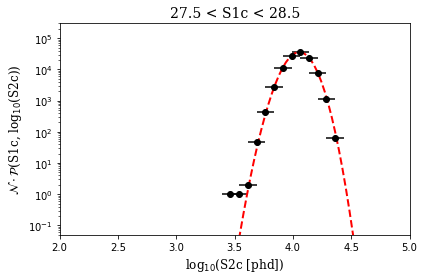

27 29.5 28.5
111515.0
Plotting....
[ 4.11221630e+00  1.05475621e-01 -8.16814473e-01  8.36098083e+03]


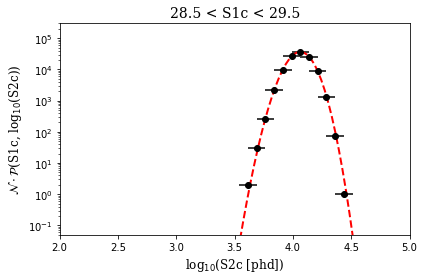

28 30.5 29.5
110129.0
Plotting....
[ 4.11626496e+00  1.02723376e-01 -7.48784409e-01  8.25664064e+03]


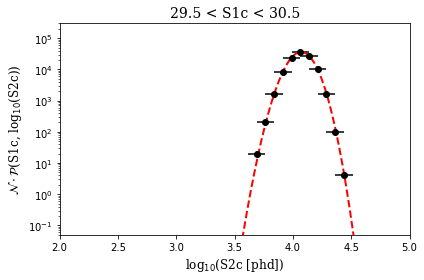

29 31.5 30.5
109476.0
Plotting....
[ 4.12241603e+00  1.01722476e-01 -7.41119778e-01  8.21813056e+03]


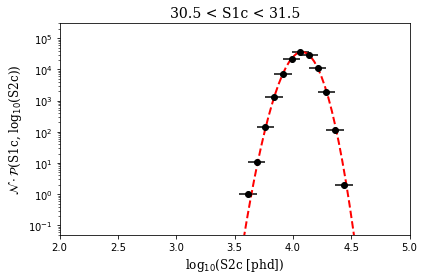

30 32.5 31.5
108854.0
Plotting....
[ 4.13117372e+00  1.00864990e-01 -7.63043611e-01  8.16750153e+03]


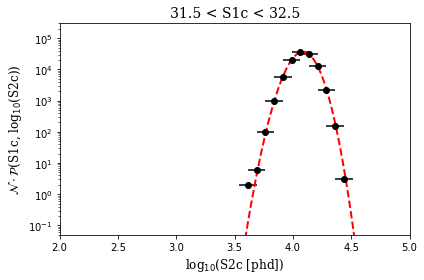

31 33.5 32.5
107535.0
Plotting....
[ 4.12842052e+00  9.52514751e-02 -6.05330024e-01  8.05407384e+03]


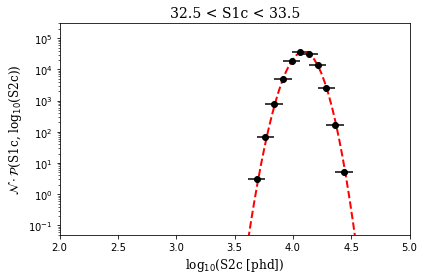

32 34.5 33.5
107501.0
Plotting....
[ 4.14319269e+00  9.85569051e-02 -7.57737779e-01  8.06150987e+03]


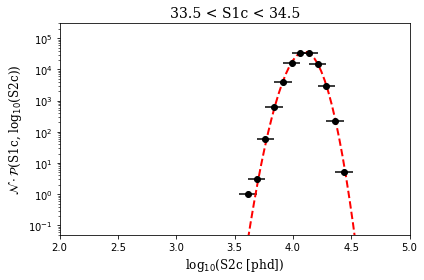

33 35.5 34.5
107113.0
Plotting....
[ 4.14715640e+00  9.68135584e-02 -7.12101497e-01  8.03899901e+03]


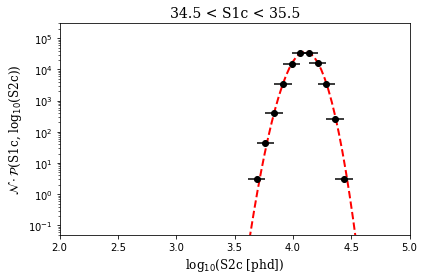

34 36.5 35.5
106289.0
Plotting....
[ 4.14905205e+00  9.38029400e-02 -6.37301045e-01  7.97505997e+03]


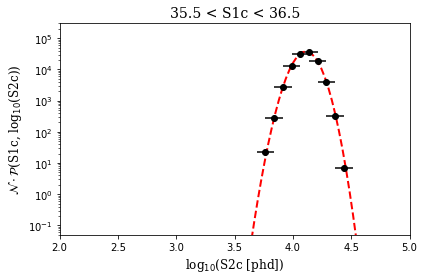

35 37.5 36.5
106067.0
Plotting....
[ 4.15761268e+00  9.42091888e-02 -6.96425456e-01  7.95081488e+03]


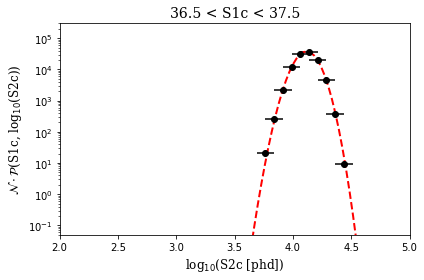

36 38.5 37.5
105545.0
Plotting....
[ 4.16389991e+00  9.33487855e-02 -7.18219791e-01  7.90902987e+03]


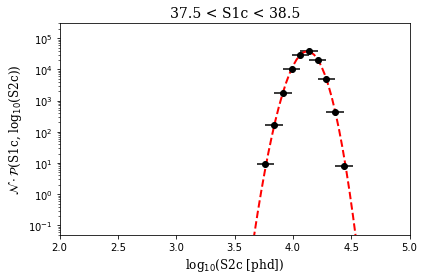

37 39.5 38.5
105296.0
Plotting....
[ 4.16711945e+00  9.17265095e-02 -6.67778296e-01  7.89518069e+03]


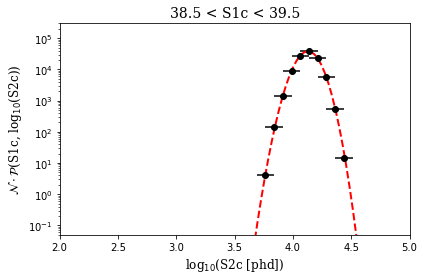

38 40.5 39.5
104487.0
Plotting....
[ 4.16884813e+00  8.90876314e-02 -6.05504618e-01  7.83805382e+03]


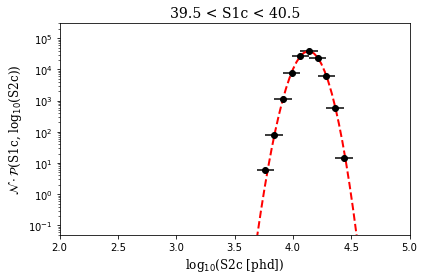

39 41.5 40.5
103826.0
Plotting....
[ 4.17489495e+00  8.85648914e-02 -6.12406813e-01  7.78336789e+03]


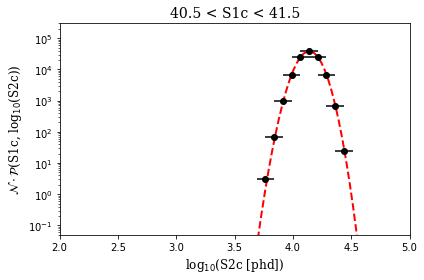

40 42.5 41.5
103504.0
Plotting....
[ 4.18367268e+00  8.96518988e-02 -6.90086241e-01  7.75616750e+03]


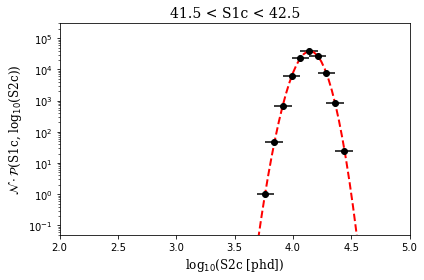

41 43.5 42.5
102750.0
Plotting....
[4.14878013e+00 7.95176991e-02 2.75836929e-04 7.71527509e+03]


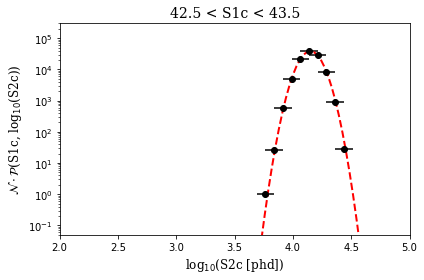

42 44.5 43.5
102629.0
Plotting....
[ 4.18741219e+00  8.59553322e-02 -5.71014768e-01  7.69336741e+03]


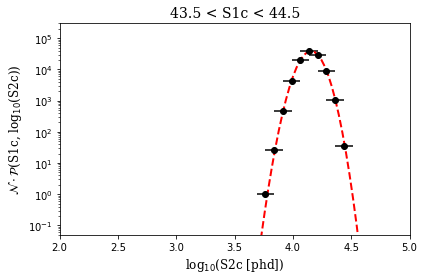

43 45.5 44.5
102450.0
Plotting....
[ 4.18529811e+00  8.21013560e-02 -4.32827331e-01  7.67466016e+03]


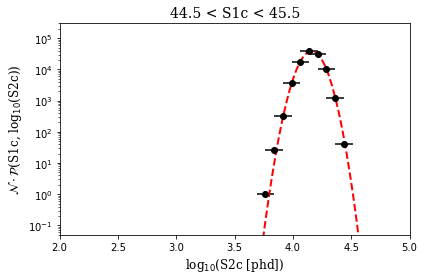

44 46.5 45.5
102195.0
Plotting....
[ 4.19334381e+00  8.23520852e-02 -5.12363785e-01  7.65118460e+03]


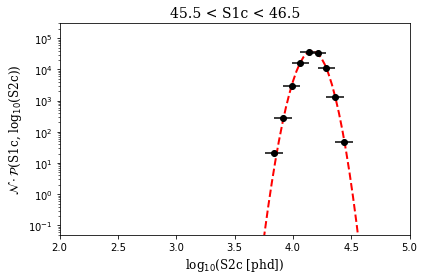

45 47.5 46.5
101450.0
Plotting....
[ 4.16801201e+00  7.63694416e-02 -3.77367019e-04  7.59443574e+03]


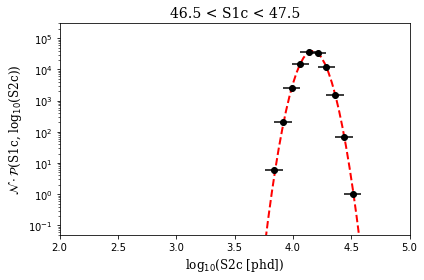

46 48.5 47.5
101565.0
Plotting....
[4.17292506e+00 7.63221547e-02 2.89968420e-04 7.61826064e+03]


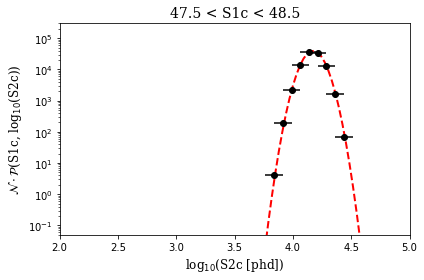

47 49.5 48.5
100242.0
Plotting....
[4.15828567e+00 7.82071679e-02 3.27693089e-01 7.51469147e+03]


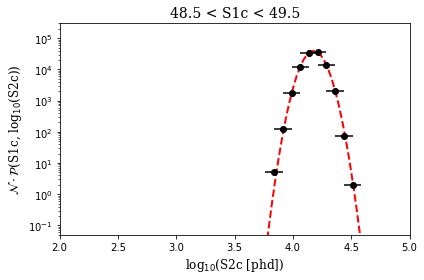

48 50.5 49.5
100739.0
Plotting....
[ 4.20664122e+00  7.92527776e-02 -4.26219089e-01  7.54779330e+03]


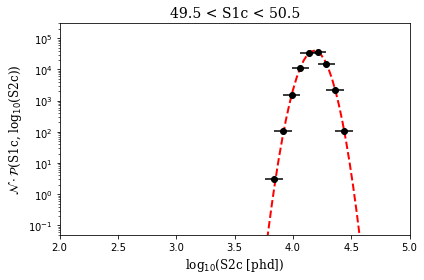

49 51.5 50.5
100405.0
Plotting....
[ 4.18649869e+00  7.43674166e-02 -1.73485978e-04  7.51879808e+03]


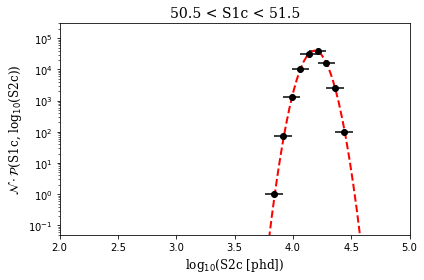

50 52.5 51.5
99654.0
Plotting....
[4.19105978e+00 7.45436491e-02 3.29848544e-04 7.46914071e+03]


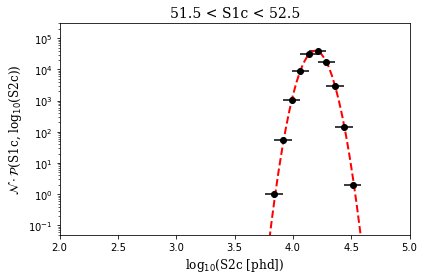

51 53.5 52.5
99535.0
Plotting....
[ 4.21753662e+00  7.70573398e-02 -4.02413160e-01  7.45764466e+03]


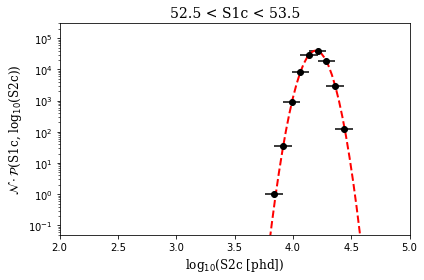

52 54.5 53.5
98833.0
Plotting....
[ 4.21557862e+00  7.46696589e-02 -2.95503838e-01  7.40102835e+03]


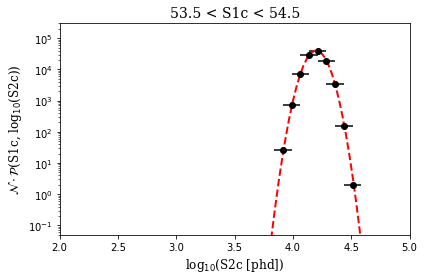

53 55.5 54.5
99096.0
Plotting....
[4.18898096e+00 7.36976647e-02 2.43884893e-01 7.42365159e+03]


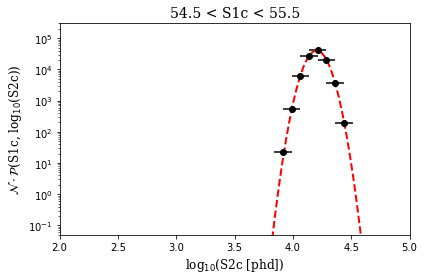

54 56.5 55.5
99051.0
Plotting....
[ 4.23445650e+00  7.74149935e-02 -5.04059422e-01  7.43038629e+03]


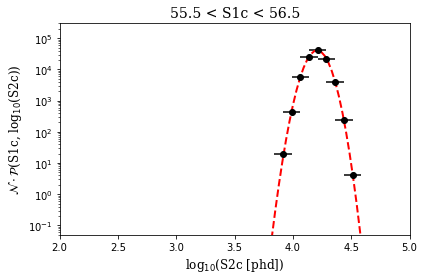

55 57.5 56.5
98307.0
Plotting....
[4.18165328e+00 7.75598414e-02 5.36872458e-01 7.37052149e+03]


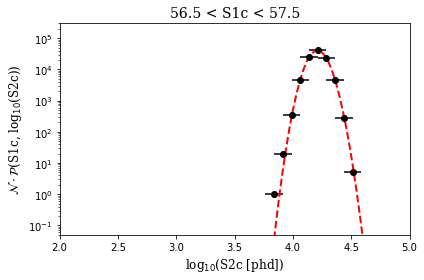

56 58.5 57.5
97776.0
Plotting....
[4.20514843e+00 7.17354902e-02 1.59703725e-01 7.32356755e+03]


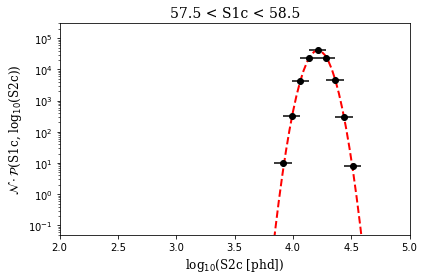

57 59.5 58.5
97944.0
Plotting....
[4.19411138e+00 7.52136450e-02 4.53143583e-01 7.34252601e+03]


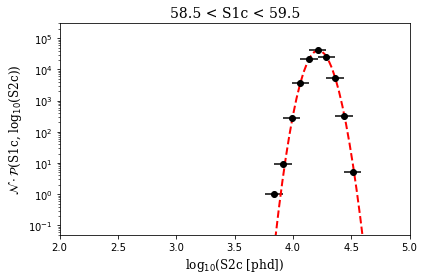

58 60.5 59.5
97427.0
Plotting....
[4.20033066e+00 7.42052807e-02 3.99852264e-01 7.30778680e+03]


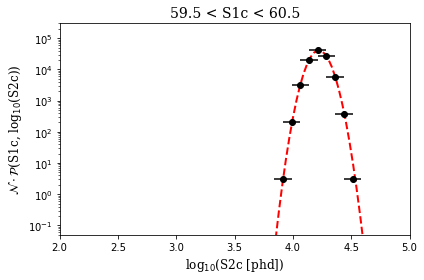

59 61.5 60.5
97406.0
Plotting....
[4.22555665e+00 7.03971896e-02 2.50265340e-04 7.30519099e+03]


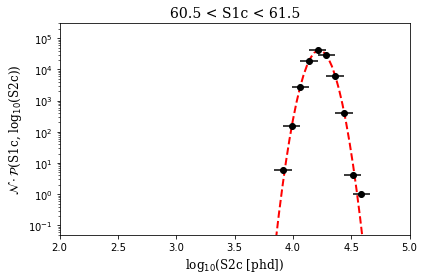

60 62.5 61.5
96568.0
Plotting....
[4.20221464e+00 7.46915367e-02 5.09718243e-01 7.23139899e+03]


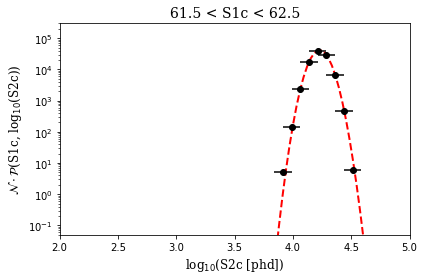

61 63.5 62.5
96643.0
Plotting....
[4.20800155e+00 7.36102373e-02 4.61382281e-01 7.24397063e+03]


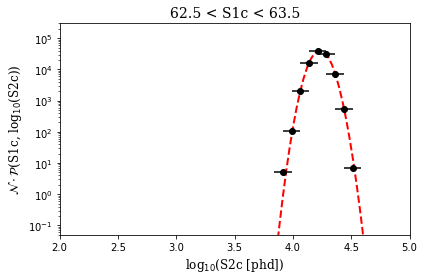

62 64.5 63.5
95817.0
Plotting....
[4.21512417e+00 7.25634085e-02 3.87739672e-01 7.18921671e+03]


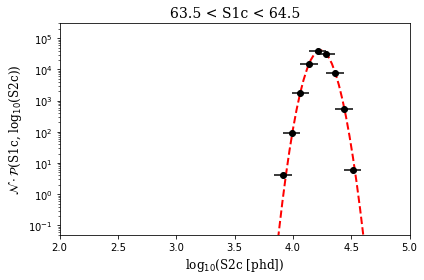

63 65.5 64.5
95850.0
Plotting....
[4.20741164e+00 7.62694225e-02 6.22621640e-01 7.19423044e+03]


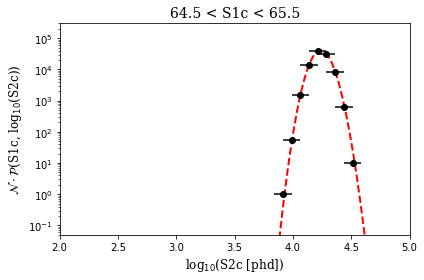

64 66.5 65.5
95576.0
Plotting....
[4.21408901e+00 7.46207303e-02 5.54864845e-01 7.16637637e+03]


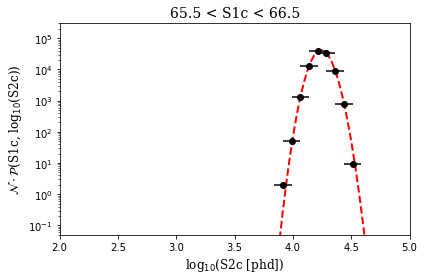

65 67.5 66.5
95582.0
Plotting....
[4.21473069e+00 7.49920100e-02 6.12772472e-01 7.16925761e+03]


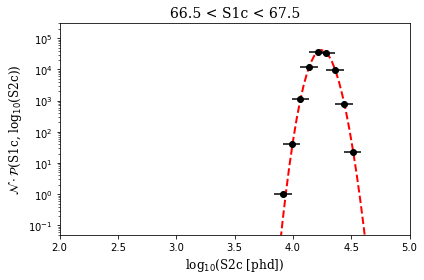

66 68.5 67.5
95106.0
Plotting....
[4.21917075e+00 7.41934357e-02 5.93832518e-01 7.13029801e+03]


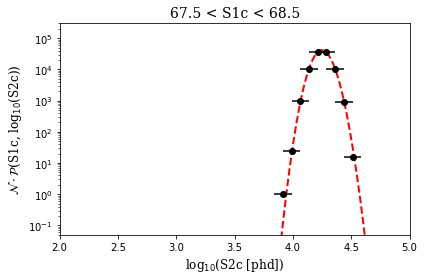

67 69.5 68.5
95391.0
Plotting....
[4.22006245e+00 7.50076895e-02 6.37712525e-01 7.15475460e+03]


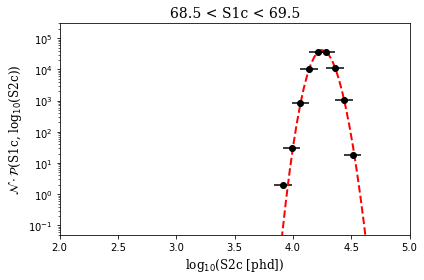

68 70.5 69.5
95087.0
Plotting....
[4.21784873e+00 7.73292584e-02 7.68143131e-01 7.13893046e+03]


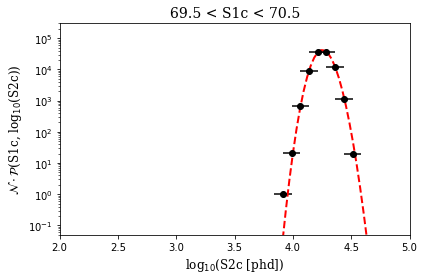

69 71.5 70.5
94793.0
Plotting....
[4.22564428e+00 7.47456625e-02 6.68325263e-01 7.11410403e+03]


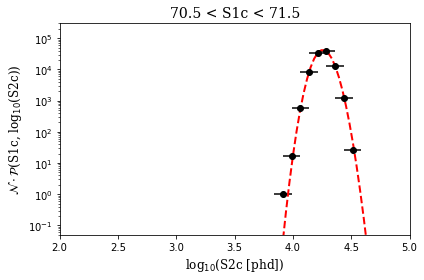

70 72.5 71.5
94929.0
Plotting....
[4.23896708e+00 7.09114001e-02 4.39683462e-01 7.12002199e+03]


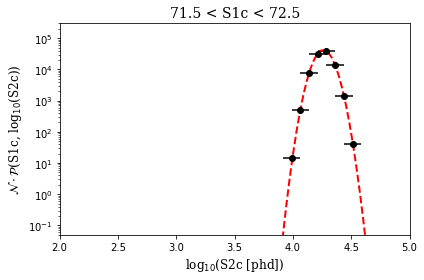

71 73.5 72.5
94176.0
Plotting....
[4.22824137e+00 7.59721776e-02 7.44707763e-01 7.07101536e+03]


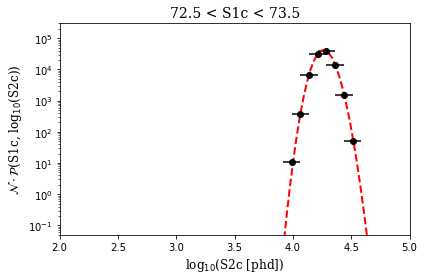

72 74.5 73.5
94060.0
Plotting....
[4.24127451e+00 7.08839204e-02 5.14707024e-01 7.05221863e+03]


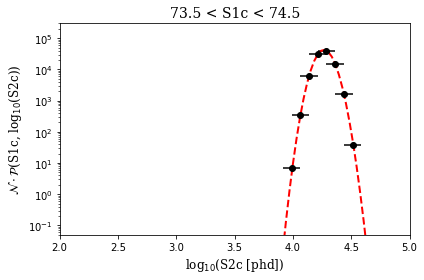

73 75.5 74.5
94194.0
Plotting....
[4.23530387e+00 7.50892392e-02 7.29008751e-01 7.07622330e+03]


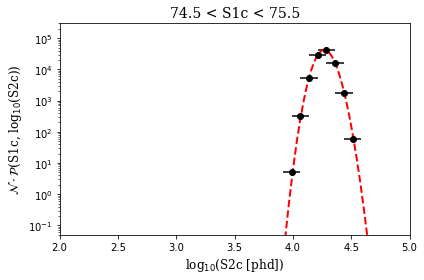

74 76.5 75.5
93961.0
Plotting....
[4.24333147e+00 7.23028849e-02 6.05142432e-01 7.05717669e+03]


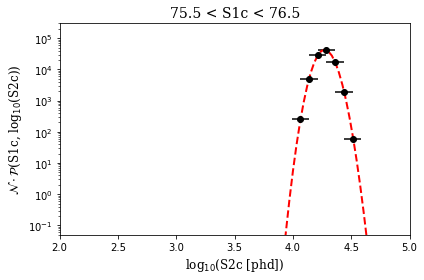

75 77.5 76.5
93359.0
Plotting....
[4.24552644e+00 7.21959855e-02 6.19458123e-01 7.00607179e+03]


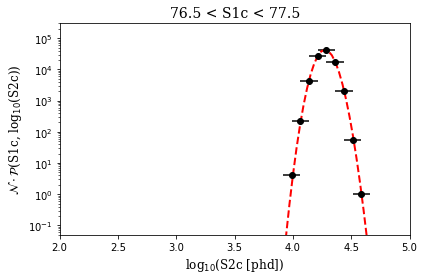

76 78.5 77.5
93222.0
Plotting....
[4.24718871e+00 7.24857274e-02 6.41763146e-01 7.00533645e+03]


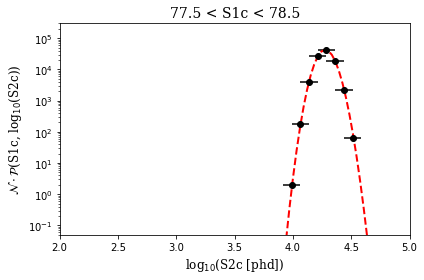

77 79.5 78.5
93516.0
Plotting....
[4.24775932e+00 7.29783138e-02 7.04166841e-01 7.02209271e+03]


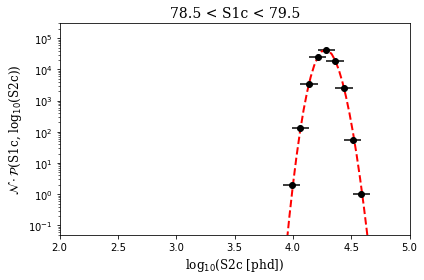

78 80.5 79.5
92702.0
Plotting....
[4.25131585e+00 7.26205869e-02 6.87469278e-01 6.95944074e+03]


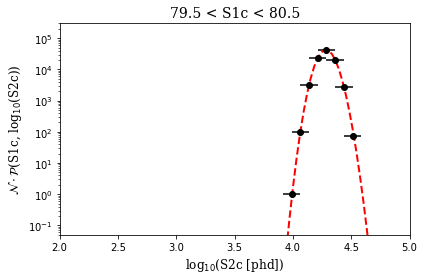

79 81.5 80.5
93033.0
Plotting....
[4.25913833e+00 6.98398327e-02 5.66312318e-01 6.97821156e+03]


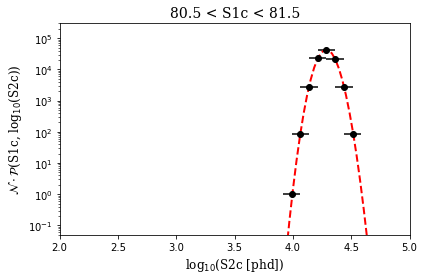

80 82.5 81.5
92692.0
Plotting....
[4.26076870e+00 7.01015200e-02 5.98267405e-01 6.94718426e+03]


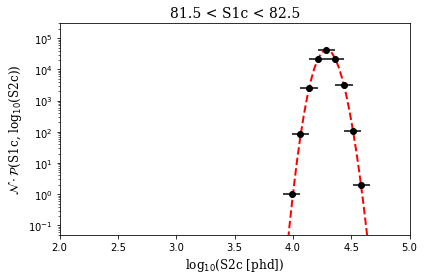

81 83.5 82.5
92466.0
Plotting....
[4.26060352e+00 7.14052057e-02 6.66129627e-01 6.93591823e+03]


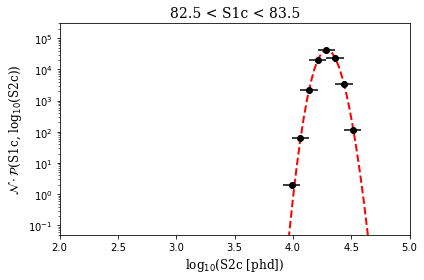

82 84.5 83.5
91900.0
Plotting....
[4.26229885e+00 7.15707268e-02 6.75768711e-01 6.89640001e+03]


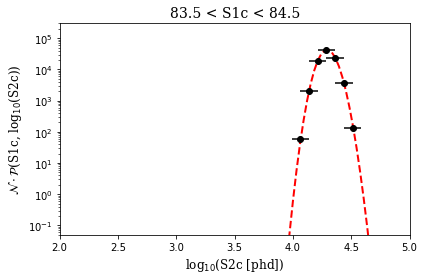

83 85.5 84.5
91903.0
Plotting....
[4.26489819e+00 7.07368144e-02 6.78466642e-01 6.88930985e+03]


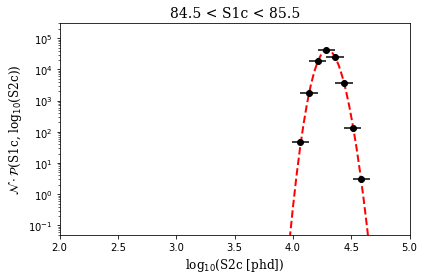

84 86.5 85.5
92012.0
Plotting....
[4.26781592e+00 7.08818841e-02 6.76819480e-01 6.90155055e+03]


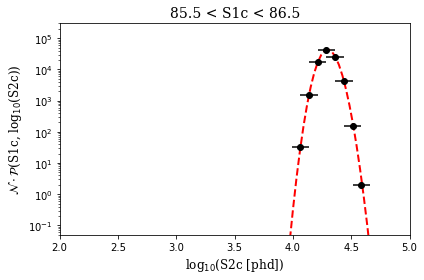

85 87.5 86.5
91711.0
Plotting....
[4.26487284e+00 7.28599354e-02 8.24043350e-01 6.87362545e+03]


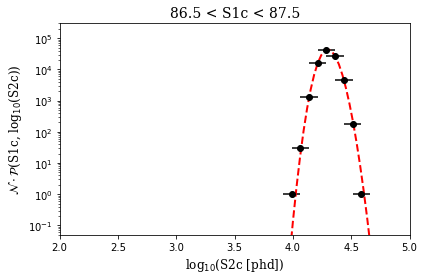

86 88.5 87.5
91829.0
Plotting....
[4.26764019e+00 7.29035742e-02 8.21868457e-01 6.88684986e+03]


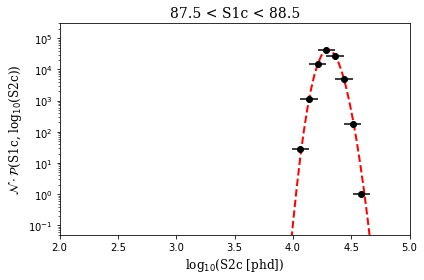

87 89.5 88.5
91310.0
Plotting....
[4.27508928e+00 7.04414187e-02 6.77921689e-01 6.85317466e+03]


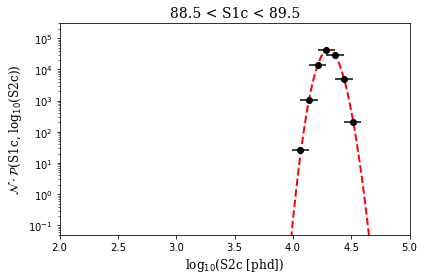

88 90.5 89.5
91895.0
Plotting....
[4.27918298e+00 6.93584816e-02 6.45424775e-01 6.89499500e+03]


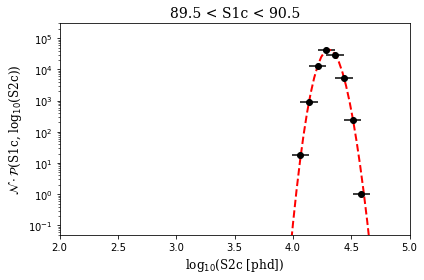

89 91.5 90.5
91220.0
Plotting....
[4.27561551e+00 7.17183640e-02 8.03135490e-01 6.84150210e+03]


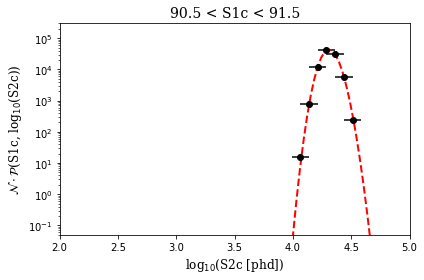

90 92.5 91.5
91061.0
Plotting....
[4.27844434e+00 7.14935485e-02 7.84387272e-01 6.83395193e+03]


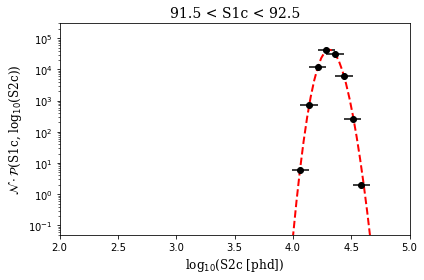

91 93.5 92.5
90515.0
Plotting....
[4.28059401e+00 7.14185018e-02 7.97613626e-01 6.79358975e+03]


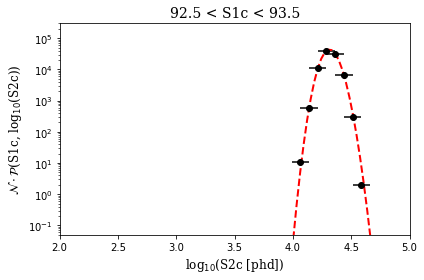

92 94.5 93.5
90931.0
Plotting....
[4.28182517e+00 7.21275435e-02 8.26780484e-01 6.82154611e+03]


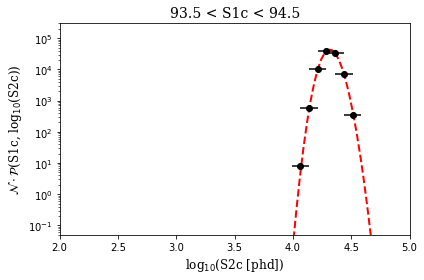

93 95.5 94.5
90670.0
Plotting....
[4.28408478e+00 7.17196478e-02 8.31656121e-01 6.80792700e+03]


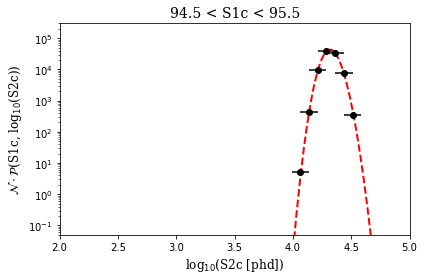

94 96.5 95.5
90653.0
Plotting....
[4.28758551e+00 7.08859291e-02 7.94351658e-01 6.80135585e+03]


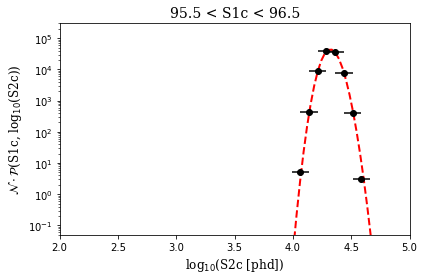

95 97.5 96.5
90686.0
Plotting....
[4.28937709e+00 7.08138793e-02 8.11961547e-01 6.80296299e+03]


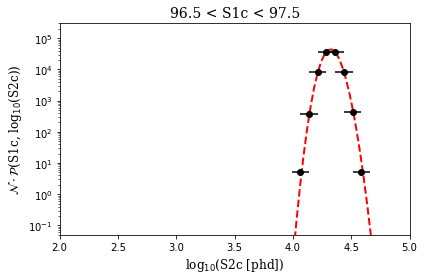

96 98.5 97.5
90169.0
Plotting....
[4.28788786e+00 7.28831527e-02 9.19759126e-01 6.76811057e+03]


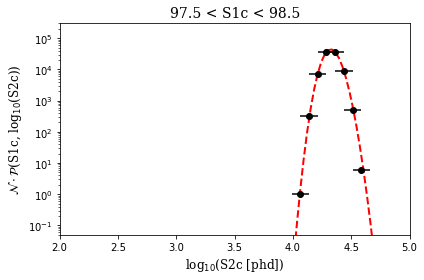

97 99.5 98.5
89587.0
Plotting....
[4.29422031e+00 7.02342226e-02 7.96662389e-01 6.72184375e+03]


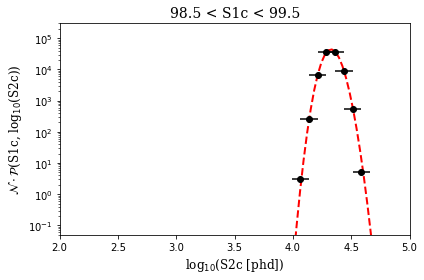

98 100.5 99.5
90210.0
Plotting....
[4.29950817e+00 6.86815137e-02 7.08969725e-01 6.77130406e+03]


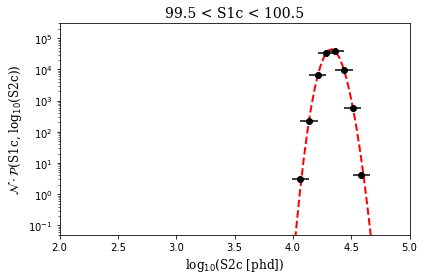

In [21]:
X, XI, OMEGA, ALPHA, NORM = [], [], [], [], []
X_ERR, XI_ERR, OMEGA_ERR, ALPHA_ERR, NORM_ERR = [], [], [], [], []
NR_Means = []
for i in range(nS1Bins):  #get the i-th S1 bin
    print(i, histX[i+1], histX[i])
    binCenters, probValues = [], []
    s1BinWidth = histX[i+1]-histX[i]
    yErr = []
    thisNorm = sum(histZ[i]) #sum up events along the x-axis
    for j in range(len(histZ[i])): #loop through the j bins of logS2 in this i-th S1 bin
        if (histZ[i][j] == 0.):
            continue
        binWidth = histY[j+1]-histY[j] #in logspace
        binCenters.append( histY[j] + binWidth/2. )  #in log-space
        linWidth = 10.**histY[j+1] - 10.**histY[j]   # width of the bin in linear space ( units : phd )
        #divide the histogram values for this S1 bin by the 2D areas of each bin (unts: phd^2)
        #area = BinWidth*linWidth #phd*phd
        probValues.append( float(histZ[i][j]) )
        yErr.append( np.sqrt(sum(histZ[i])) ) #/totalEvents/area )
    print(sum(histZ[i]))
    popt, pcov = curve_fit(skewGauss, binCenters, probValues,\
                           p0=[np.median(binCenters), 0.1, 0., thisNorm], \
                           bounds=([logS2Min, 0., -3., 0.], [logS2Max, 1., 3., 1.0e7]))
    perr = np.sqrt(np.diag(pcov))
    fitY = []
    fitX = np.linspace( logS2Min, logS2Max, 100)
    for k in range(len(fitX)):
        fitY.append( skewGauss(fitX[k], *popt) )
    print("Plotting....")
    print(popt)
    plt.errorbar( binCenters, probValues, xerr = binWidth,fmt = 'k o' )
    plt.plot( fitX, fitY, 'r--', lw = 2)
    plt.yscale('log')
    plt.title(str(histX[i])+' < S1c < '+str(histX[i+1]), fontsize = 14, family='serif')
    plt.xlabel(r'log$_{10}$(S2c [phd])', fontsize = 12, family='serif')
    plt.ylabel(r'$\mathcal{N}\cdot\mathcal{P}$(S1c, log$_{10}$(S2c))', fontsize = 12, family='serif')
    plt.xlim(logS2Min, logS2Max)
    plt.ylim(0.5e-1, 300000)
    plt.tight_layout()
    plotName = "/network/rit/lab/szydagislab/GR/NEST/v2.1.0/build/skewFits/NRplots/skewFit_S1_"+str(int(histX[i]+0.5))+".png"
    plt.savefig(plotName)
    plt.show()
    X.append( np.mean([histX[i], histX[i+1]]) )
    X_ERR.append( 0.5 )
    XI.append( popt[0] )
    XI_ERR.append( perr[0] )
    OMEGA.append( popt[1] )
    OMEGA_ERR.append( perr[1] )
    ALPHA.append( popt[2] )
    ALPHA_ERR.append( perr[2] )
    NORM.append( popt[3] ) #/float(totalEvents) )
    NORM_ERR.append( perr[3] ) #/float(totalEvents) )
    delta = popt[2]/np.sqrt(1. + popt[2]*popt[2] )
    mean = popt[0] + popt[1]*delta*np.sqrt(2./np.pi)  #conversion from xi,omega,alpha to mu
    NR_Means.append(mean)
        
        

S1, S2, logS2 = newS1.copy(), newS2.copy(), newLogS2.copy()

#go through S1 bins and fit skew gaussians

minS1 = 1.5
binWidth = 1.
stop = 100.5

nLogBins = 100
logS2Min, logS2Max = 2., 4.
NR_medians = []
#S1 list is sorted, so can just march through the data
thisS1List, thisLogS2List = [], []

X, XI, OMEGA, ALPHA, NORM = [], [], [], [], []
X_ERR, XI_ERR, OMEGA_ERR, ALPHA_ERR, NORM_ERR = [], [], [], [], []
N_Entries = []
for i in range(len(S1)):
    if ( S1[i] > minS1 and S1[i]  < (minS1 + binWidth)):
        thisS1List.append( S1[i] )
        thisLogS2List.append( logS2[i] )
    if ( S1[i+1] > minS1 + binWidth):
        
        '''plt.hist2d( thisS1List, thisLogS2List, bins = 100, norm=LogNorm())
        plt.show()
        plt.hist( thisS1List, bins = 10, histtype = 'step')
        plt.show()'''
        mean = np.mean( thisLogS2List )
        stdDev = np.std( thisLogS2List )
        NR_medians.append( np.median( thisLogS2List ) )
        histY, histX = np.histogram(thisLogS2List, bins = nLogBins, range=(logS2Min,logS2Max), density = True )
        #histY, histX = np.histogram(thisLogS2List, bins = nLogBins, range=(logS2Min,logS2Max) )        
        binCenters = []
        for i in range(len(histY)):
            binCenters.append( np.mean([histX[i], histX[i+1]]) )
            
        #popt, pcov = curve_fit(skewGauss, binCenters, histY, bounds=([1.8, 0.05, 0.5], [4., 0.3, 3.]), p0 = [np.mean(thisLogS2List), np.std(thisLogS2List), 2.])
        popt, pcov = curve_fit(skewGauss, binCenters, histY, p0 = [np.mean(thisLogS2List), np.std(thisLogS2List), 2.])
        perr = np.sqrt(np.diag(pcov))
        fitY = []
        for i in range(len(binCenters)):
            fitY.append( skewGauss(binCenters[i], *popt) )
        print("Plotting....")
        print(popt)
        plt.hist(thisLogS2List, bins = nLogBins, range=(logS2Min, logS2Max), density = True, histtype='step' )
        #plt.hist(thisLogS2List, bins = nLogBins, range=(logS2Min, logS2Max), histtype='step' )
        plt.plot( binCenters, fitY, 'r--')
        plt.yscale('log')
        plt.xlim(logS2Min, logS2Max)
        plt.ylim(1e-4, 7.5)
        plt.xlabel( r'log$_{10}$(S2c/S1c)', fontsize = 14, family = 'serif')
        plt.title(r'%.1f < S1c < %.1f' % (minS1, minS1+binWidth), fontsize=14, family='serif')
        plt.tight_layout()
        plotName = "/network/rit/lab/szydagislab/GR/NEST/v2.1.0/build/skewFits/NRplots/skewFit_S1_"+str(int(minS1+0.5))+".png"
        plt.savefig(plotName)
        plt.show()
        X.append( minS1 + binWidth/2. )
        X_ERR.append( binWidth/2. )
        XI.append( popt[0] )
        XI_ERR.append( perr[0] )
        OMEGA.append( popt[1] )
        OMEGA_ERR.append( perr[1] )
        ALPHA.append( popt[2] )
        ALPHA_ERR.append( perr[2] )
        #NORM.append( popt[3] )
        #NORM_ERR.append( perr[3] )
        N_Entries.append( len(thisS1List) )
        
        thisS1List, thisLogS2List = [], [] #clear the lists
        
        minS1 += binWidth
        print(minS1)
        
        if minS1 >= stop:
            print("....Done!")
            break

In [22]:
for i in range(len(NR_Means)):
    print(NR_Means[i])

3.5026161004855334
3.528277283538247
3.5748500287602254
3.6272117059254834
3.6751399537704796
3.714336388704129
3.747717812958823
3.777339671151977
3.8040642630537533
3.827604651660766
3.8487578244987817
3.8685455298174514
3.8869231227318903
3.904086757872675
3.9193992839308214
3.933554243669703
3.9472015052985694
3.9600138884096925
3.972161292753047
3.983407201265845
3.9944230028519905
4.0055273039917365
4.015275527173589
4.024161871842684
4.033322204481698
4.042752128789561
4.051517227510487
4.058978077556109
4.067139177635888
4.074089745467897
4.082354111253332
4.089064496959012
4.095700660017514
4.102349102737669
4.1088280815541625
4.1146547333664545
4.1204509457724745
4.126475689186065
4.132031114861195
4.137990076958833
4.143044490198723
4.148797627652698
4.153404353421705
4.159277488477043
4.16338155177903
4.167989016773621
4.172942720332118
4.17771711649603
4.181847558191626
4.186488400272398
4.1910793977196885
4.194583854748996
4.198694902917448
4.2029135673155515
4.2066539286

# Home strech! Fit functions to the skew-Gaussian's best fit parameters
### This will provide $\xi$, $\omega$, $\alpha$, and the normalization as functions of S1c

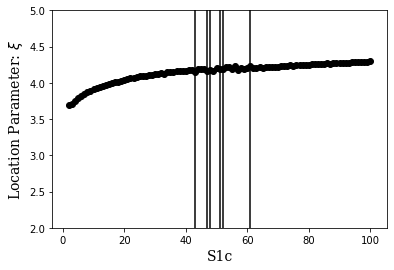

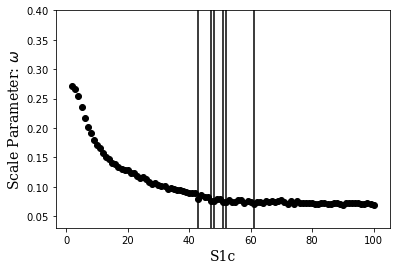

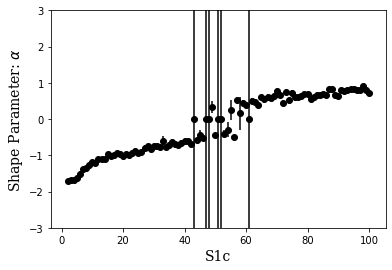

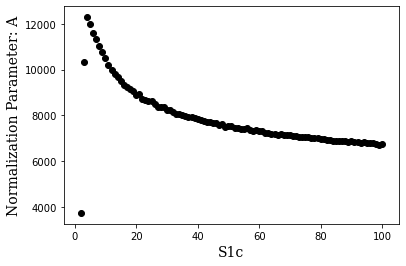

In [25]:
plt.errorbar(X, XI, xerr=X_ERR, yerr=XI_ERR, fmt = 'k o')
plt.xlabel( 'S1c', fontsize = 14, family = 'serif' )
plt.ylabel( r'Location Parameter: $\xi$', fontsize = 14, family = 'serif')
plt.ylim( 2., 5. )
plt.show()

plt.errorbar(X, OMEGA, xerr=X_ERR, yerr=OMEGA_ERR, fmt = 'k o')
plt.xlabel( 'S1c', fontsize = 14, family = 'serif'  )
plt.ylabel( r'Scale Parameter: $\omega$', fontsize = 14, family = 'serif' )
plt.ylim( 0.03, 0.4)
plt.show()

plt.errorbar(X, ALPHA, xerr=X_ERR, yerr=ALPHA_ERR, fmt = 'k o')
plt.xlabel( 'S1c', fontsize = 14, family = 'serif'  )
plt.ylabel( r'Shape Parameter: $\alpha$', fontsize = 14, family = 'serif' )
plt.ylim( -3., 3.)
plt.show()

plt.errorbar(X, NORM, xerr=X_ERR, yerr=NORM_ERR, fmt = 'k o')
plt.xlabel( 'S1c', fontsize = 14, family = 'serif'  )
plt.ylabel( r'Normalization Parameter: A', fontsize = 14, family = 'serif' )
#plt.ylim(0., 750)
plt.show()


/network/rit/misc/software/jupyterhub/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


[-1.70113043 -2.25007658  4.82514391] [0.02836122 0.30352457 0.00934829]


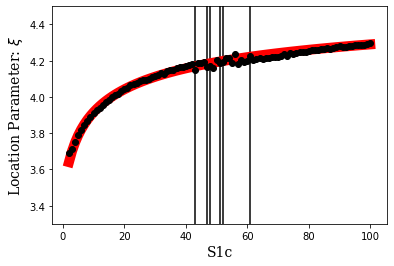

In [26]:
#try some functions to fit the skew parameters as functions of S1
def XI_FUNC(x, a, b, c):
    return a*(x-b)**-0.25 + c

poptXI, pcov = curve_fit( XI_FUNC, X, XI, sigma=XI_ERR )
perrXI = np.sqrt(np.diag(pcov))
print( poptXI, perrXI )

fitY = []
for i in range(len(X)):
    fitY.append( XI_FUNC(X[i], *poptXI))

    
plt.errorbar(X, XI, xerr=X_ERR, yerr=XI_ERR, fmt = 'k o')
plt.plot(X, fitY, 'r', lw = 10)
plt.xlabel( 'S1c', fontsize = 14, family = 'serif' )
plt.ylabel( r'Location Parameter: $\xi$', fontsize = 14, family = 'serif')
plt.ylim(3.3, 4.5)
plotName = "/network/rit/lab/szydagislab/GR/NEST/v2.1.0/build/skewFits/NRplots/skewFits_locationParameters.png"
plt.savefig(plotName)
plt.show()

[ 1.89961999 -5.54054757  0.04972334] [0.04707218 0.31228931 0.00061043]


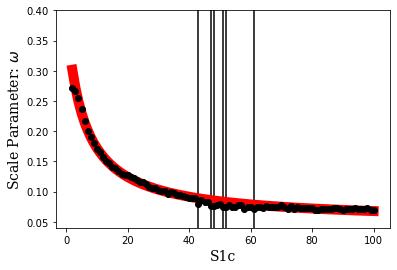

In [27]:
def OMEGA_FUNC(x, a, b,c):
    return a/(x-b) + c
    
    
poptOMEGA, pcov = curve_fit( OMEGA_FUNC, X, OMEGA, sigma=OMEGA_ERR )
perrOMEGA = np.sqrt(np.diag(pcov))
print( poptOMEGA, perrOMEGA )

fitY = []
for i in range(len(X)):
    fitY.append( OMEGA_FUNC(X[i], *poptOMEGA))

    
plt.errorbar(X, OMEGA, xerr=X_ERR, yerr=OMEGA_ERR, fmt = 'k o')
plt.plot(X, fitY, 'r', lw = 10)
plt.xlabel( 'S1c', fontsize = 14, family = 'serif' )
plt.ylabel( r'Scale Parameter: $\omega$', fontsize = 14, family = 'serif')
plt.ylim(0.04, 0.4)
plotName = "/network/rit/lab/szydagislab/GR/NEST/v2.1.0/build/skewFits/NRplots/skewFits_scaleParameters.png"
plt.savefig(plotName)
plt.show()

[-0.32915996 -2.42805704] [0.00749916 0.05497713]


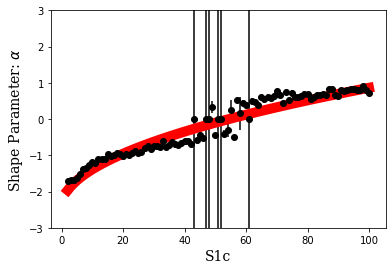

In [28]:
def ALPHA_FUNC(x, a,  c):
    return -a*x**0.5 + c
    #return a/(x - b) + c

poptALPHA, pcov = curve_fit( ALPHA_FUNC, X, ALPHA, sigma=ALPHA_ERR )
perrALPHA = np.sqrt(np.diag(pcov))
print( poptALPHA, perrALPHA )

fitY = []
for i in range(len(X)):
    fitY.append( ALPHA_FUNC(X[i], *poptALPHA))

    
plt.errorbar(X, ALPHA, xerr=X_ERR, yerr=ALPHA_ERR, fmt = 'k o')
plt.plot(X, fitY, 'r', lw = 10)
plt.xlabel( 'S1c', fontsize = 14, family = 'serif' )
plt.ylabel( r'Shape Parameter: $\alpha$', fontsize = 14, family = 'serif')
plt.ylim(-3, 3.)
plotName = "/network/rit/lab/szydagislab/GR/NEST/v2.1.0/build/skewFits/NRplots/skewFits_shapeParameters.png"
plt.savefig(plotName)
plt.show()

[-129866.67527072   86963.0897636     6095.8556875 ] [1279.88740548  779.38661201   12.75706904]


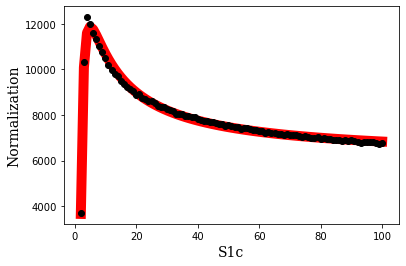

In [64]:
def NORM_FUNC(x, a, c, d):
    return abs(a/(x)**(1.5) + c/x + d)

'''for i in range(len(NORM)):
    NORM[i] /= totalEvents
    NORM_ERR[i] /= totalEvents'''
poptNORM, pcov = curve_fit( NORM_FUNC, X, NORM, sigma=NORM_ERR )
perrNORM = np.sqrt(np.diag(pcov))
print( poptNORM, perrNORM )

fitY = []
for i in range(len(X)):
    fitY.append( NORM_FUNC(X[i], *poptNORM))

    
plt.errorbar(X, NORM, xerr=X_ERR, yerr=NORM_ERR, fmt = 'k o')
plt.plot(X, fitY, 'r', lw = 10)
plt.xlabel( 'S1c', fontsize = 14, family = 'serif' )
plt.ylabel( r'Normalization', fontsize = 14, family = 'serif')
#plt.ylim(0, 2)
plotName = "/network/rit/lab/szydagislab/GR/NEST/v2.1.0/build/skewFits/NRplots/skewFits_normalizations.png"
plt.savefig(plotName)
plt.show()

# Put it all together to make the PDF(S1, logS2) function
### Generate events uniformly in S1-logS2 space, and plot the PDF values to compare with the input histogram

In [65]:
def PDF( S1c, logS2c ):
    xi = XI_FUNC(S1c, *poptXI)
    omega = OMEGA_FUNC(S1c, *poptOMEGA)
    alpha = ALPHA_FUNC(S1c, *poptALPHA)
    norm = NORM_FUNC(S1c, *poptNORM)/totalEvents

    prob = skewGauss(logS2c , xi, omega, alpha, norm)
    if prob < 0.:
        print(S1c, logS2c, xi, omega, alpha, norm)
    return prob
        
s1 = np.linspace(s1Min, s1Max, 250)
ls2 = np.linspace(logS2Min, logS2Max, 250)
P = []
print("Starting")
thresh = 0.
pS1, pLogS2 = [], []
for i in range(len(s1)):
    #print(i)
    if (float(i)/float(len(s1))*100.) >= thresh:
        print( '%i / 100' % thresh)
        thresh += 10.
    for j in range(len(ls2)):
        #print(j)
        pS1.append( s1[i] )
        pLogS2.append( ls2[j] )
        P.append( PDF(s1[i], ls2[j]) )
        
print("....Done!")

Starting
0 / 100
10 / 100
20 / 100
30 / 100
40 / 100
50 / 100
60 / 100
70 / 100
80 / 100
90 / 100
....Done!


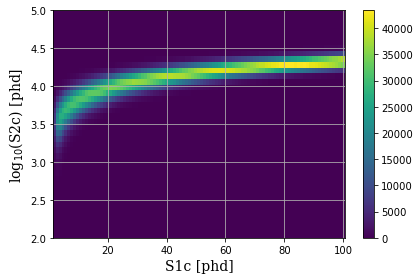

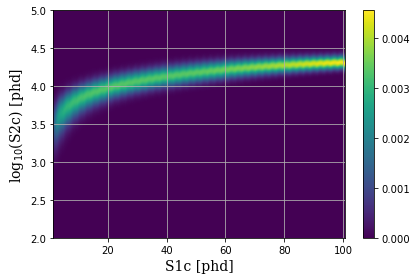

Done!


In [67]:
cm = plt.cm.get_cmap('viridis')

h = plt.hist2d(S1, logS2, bins=(nS1Bins, nS2Bins), range=([s1Min, s1Max], [logS2Min, logS2Max]))#, range=([1.5, 100.5], [500, 50000]))
plt.colorbar(h[3])
plt.xlim(s1Min, s1Max)
plt.ylim(logS2Min, logS2Max)
plt.xlabel('S1c [phd]', fontsize = 14, family='serif')
plt.ylabel(r'log$_{10}$(S2c) [phd]', fontsize = 14, family='serif')
plt.grid()
plt.tight_layout()
plotName = "/network/rit/lab/szydagislab/GR/NEST/v2.1.0/build/skewFits/NRplots/s1LogS2_histogram.png"
plt.savefig(plotName)
plt.show()


#plt.hist2d( plotS1, plotS2, bins = 200, norm=LogNorm())

sc = plt.scatter( pS1, pLogS2, c=P, s=10, cmap = cm )
#sc = plt.scatter( field, QY, c = chi2, s = 1.5, cmap = cm)
plt.colorbar(sc)
plt.xlim(1.5, 100.5)
plt.xlabel('S1c [phd]', fontsize = 14, family='serif')
plt.ylabel(r'log$_{10}$(S2c) [phd]', fontsize = 14, family='serif')
plt.grid()
#plt.yscale('log')
plt.ylim(logS2Min, logS2Max)
plt.tight_layout()
plotName = "/network/rit/lab/szydagislab/GR/NEST/v2.1.0/build/skewFits/NRplots/s1LogS2_analytical.png"
plt.savefig(plotName)
plt.show()


print('Done!')